In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import datetime

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

In [3]:
df_taxi=pd.read_csv("train.csv")

In [1]:
df_taxi.head()

NameError: name 'df_taxi' is not defined

In [ ]:
#ターゲット（運賃）のヒストグラム
df_taxi.fare_amount.hist(bins=100,figsize=(14,3))
plt.gca().set_yscale("log")
plt.xlabel('fare_amount')
plt.title('Histgram')

0近辺に大きく寄っている。

In [ ]:
df_taxi[df_taxi.fare_amount<1000].fare_amount.hist(bins=100,figsize=(14,3))
plt.gca().set_yscale("log")
plt.xlabel('fare_amount')
plt.title('Histgram')

マイナスも結構ある？

In [ ]:
df_taxi.describe()

In [ ]:
df_taxi.dtypes

In [ ]:
len(df_taxi)

### 母数が非常に大きい(5580万件）ので、データを軽く見るためにサンプルをとる(1%=55万件）

In [ ]:
sa_df_taxi=df_taxi.sample(frac=0.01)

In [ ]:
sa_df_taxi.to_csv("sa_df_taxi.csv")

In [107]:
sa_df_taxi=pd.read_csv("sa_df_taxi.csv")

In [139]:
sa_df_taxi.head()

Unnamed: 0                            key  fare_amount     pickup_datetime  \
0    21356632  2009-12-12 03:13:00.000000108          4.1 2009-12-12 03:13:00   
1    50546038   2012-01-19 09:15:00.00000047          7.3 2012-01-19 09:15:00   
2    52639659   2012-04-14 05:28:00.00000036         10.9 2012-04-14 05:28:00   
3    43248441    2009-12-26 11:43:02.0000002          8.9 2009-12-26 11:43:02   
4    17204185    2010-07-15 08:00:10.0000001         16.9 2010-07-15 08:00:10   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.992012        40.725462         -73.983183         40.730472   
1        -74.002012        40.735002         -74.014072         40.717655   
2        -73.985736        40.757421         -73.988804         40.719380   
3        -73.978170        40.757699         -73.999385         40.721921   
4        -73.989956        40.725505         -73.952312         40.789452   

   passenger_count  year  weekday  hour  
0                1  2009        5     3  
1                2  2012        3     9  
2                1  2012        5     5  
3                1  2009        5    11  
4                1  2010        3     8

In [108]:
sa_df_taxi.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      0
dtype: int64

In [109]:
# nullをドロップする。
print('Old size: %d' % len(sa_df_taxi))
sa_df_taxi = sa_df_taxi.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(sa_df_taxi))

Old size: 554239
New size: 554237


In [110]:
df_test=pd.read_csv("test.csv")

In [111]:
df_test.head()

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [112]:
df_test.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974722        40.751041         -73.973657         40.751743   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252193        40.573143         -74.263242         40.568973   
25%          -73.992501        40.736125         -73.991247         40.735254   
50%          -73.982326        40.753051         -73.980015         40.754065   
75%          -73.968013        40.767113         -73.964059         40.768757   
max          -72.986532        41.709555         -72.990963         41.696683   

       passenger_count  
count      9914.000000  
mean          1.671273  
std           1.278747  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000

## ここから先は、KaggleのNYC Taxi Fare Data Explorationを参考にする。

## ロケーションデータの探索

ロケーションデータをマップにプロットするとデータの意味が直観的にわかりやすい。そこで、下記のウェブサイトの地図データを使う。 <br>

簡単にマップとGPSのツールが使える。: https://www.gps-coordinates.net/　<br>
ロケーション間の距離計算: https://www.travelmath.com/flying-distance/ <br>
境界ボックスを使って地図をエクスポートする open street map: https://www.openstreetmap.org/export#map=8/52.154/5.295 <br>
ニューヨークの緯度経度 (https://www.travelmath.com/cities/New+York,+NY): <br>

longitude = -74.0063889 <br>
lattitude = 40.7141667 <br>
興味のある境界ボックスをテストセットの最大最小の緯度経度を使って４つの指標[long_min, long_max, latt_min, latt_max]で定義する。これによって、テストセットのすべてのpickup/dropoffの緯度経度範囲を使用することを保証する。  <br>

Open street Mapから境界ボックスを使用してマップを取得し、この外のトレーニングデータのデータポイントは除外している。<br>

In [113]:
# minimum and maximum longitude test set
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()), \
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [114]:
# minimum and maximum latitude test
min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()), \
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())

(40.568973, 41.709555)

In [115]:
# この関数はテストセットと共に使用される
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# NYCのマップ画像のロード
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# NYCにズームした画像のロード
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [116]:
print('Old size: %d' % len(sa_df_taxi))
sa_df_taxi = sa_df_taxi[select_within_boundingbox(sa_df_taxi, BB)]
print('New size: %d' % len(sa_df_taxi))

Old size: 554237
New size: 542467


In [117]:
# この関数は、ＮＹＣのマップにデータをプロットするときによく使われる
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

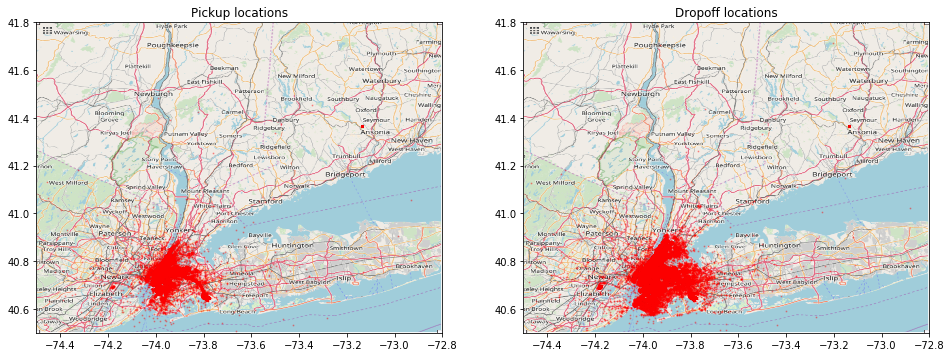

In [118]:
# マップにトレーニングデータをプロットする
plot_on_map(sa_df_taxi, BB, nyc_map, s=1, alpha=0.3)

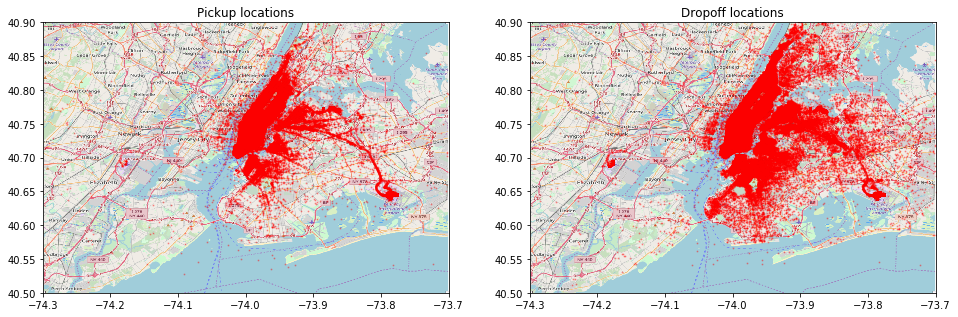

In [119]:
# ズームしたマップにトレーニングデータをプロット
plot_on_map(sa_df_taxi, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

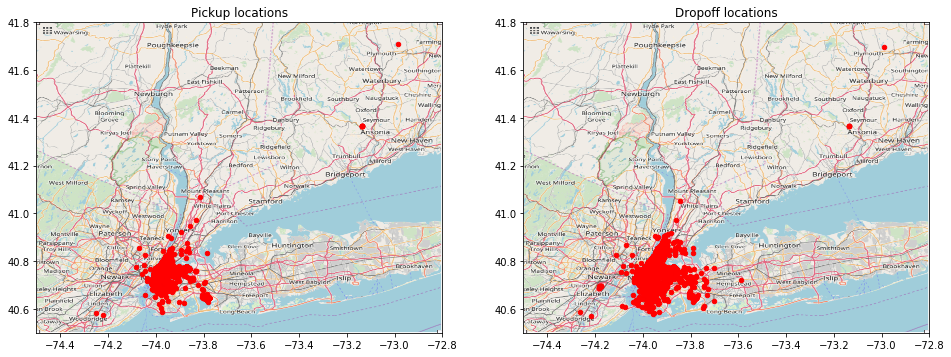

In [120]:
# テストデータをマップにプロット
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

トレーニングデータの散布図からは、いくつかの地点が　水の中にあるのが分かる。これらは、ノイズであると考えられるので、データセットからドロップすることにした。 <br>

他の興味深いデータビジュアライズの手段はこのカーネルにある。: https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation.  <br>
非常に小さい点を使うことでニューヨークの実際の街路が可視化する手法である。

In [121]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

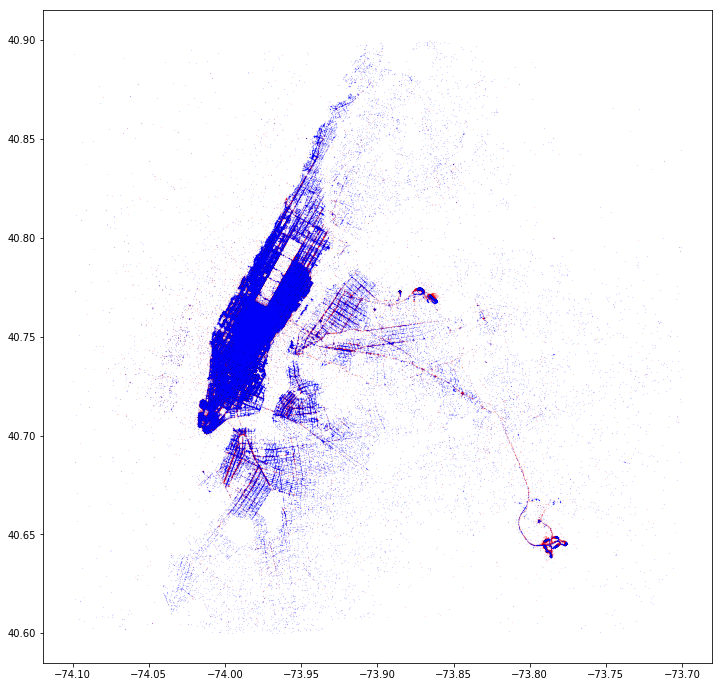

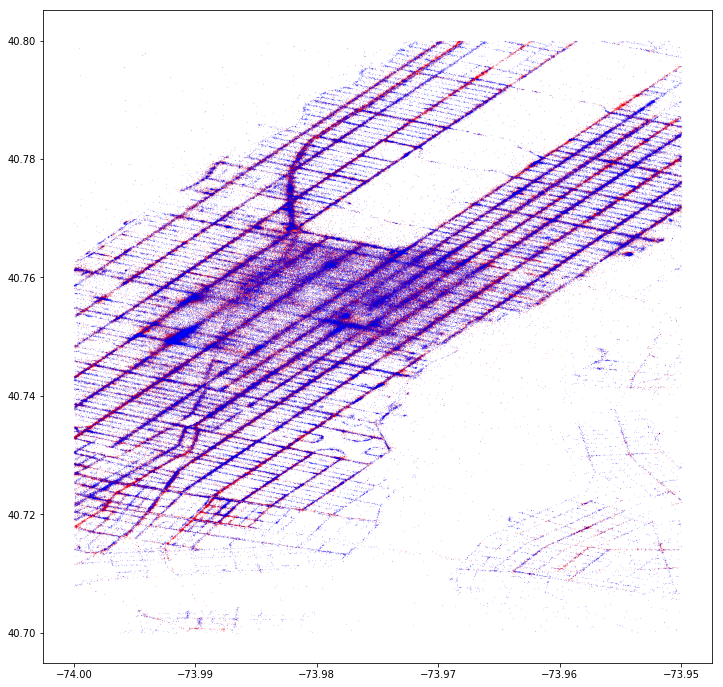

In [122]:
plot_hires(sa_df_taxi, (-74.1, -73.7, 40.6, 40.9))
plot_hires(sa_df_taxi, (-74, -73.95, 40.7, 40.8))


## 水の中のデータポイントを削除

マップと散布図で見たとおり、いくつかのデータポイントは水の中にある。これらは明らかにノイズである。これらを削除するためにブール型（True or False)の陸と水のデータマップを作製した。

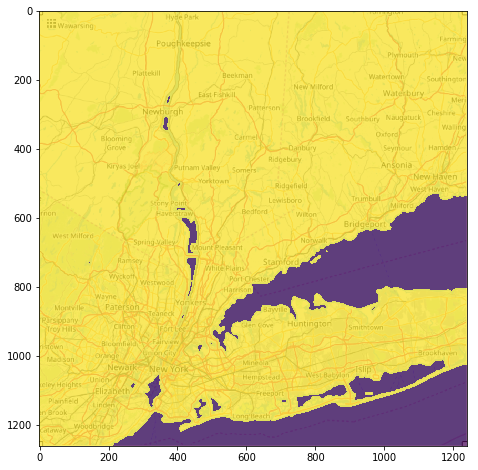

In [123]:
# 下記の論理でNYCのマスクを読み込んでブールマップにする
# 陸=True, 水=False
nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9

plt.figure(figsize=(8,8))
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, zorder=1, alpha=0.7); # Trueは黄色、Falseは紫で示す。

次に、緯度経度軸をxyピクセル軸に変換する。lonlat_to_xy関数によって行う。y軸は上下逆に変換されることに注意する。 <br>

すべてのデータポイントでxy軸はNYCマスクを使用してブーリン指数に変換される

In [124]:
# 緯度経度軸を画像のxy軸に変換
def lonlat_to_xy(longitude, latitude, dx, dy, BB):
    return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
           (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

In [125]:
pickup_x, pickup_y = lonlat_to_xy(sa_df_taxi.pickup_longitude, sa_df_taxi.pickup_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)
dropoff_x, dropoff_y = lonlat_to_xy(sa_df_taxi.dropoff_longitude, sa_df_taxi.dropoff_latitude, 
                                  nyc_mask.shape[1], nyc_mask.shape[0], BB)

In [126]:
idx = (nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x])
print("Number of trips in water: {}".format(np.sum(~idx)))

Number of trips in water: 108


１０８個の点が水の中にあることが分かった。水の中のデータポイントを削除するために、前述の関数を再利用して関数を作る。

In [127]:
def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude - BB[0])/(BB[1]-BB[0])).astype('int'), \
               (dy - dy*(latitude - BB[2])/(BB[3]-BB[2])).astype('int')

    # 境界ボックスを定義
    BB = (-74.5, -72.8, 40.5, 41.8)
    
    # nyc_maskを読み込み、下記の論理のブール型マップに変える
    # 陸=True, 水=False
    nyc_mask = plt.imread('https://aiblog.nl/download/nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0] > 0.9
    
    # それぞれの緯度経度(lon, lat）軸をマスクマップの中のxy軸に変換する。
    pickup_x, pickup_y = lonlat_to_xy(df.pickup_longitude, df.pickup_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)
    dropoff_x, dropoff_y = lonlat_to_xy(df.dropoff_longitude, df.dropoff_latitude, 
                                      nyc_mask.shape[1], nyc_mask.shape[0], BB)    
    # ブール型インデックスを計算する
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    
    # 陸のデータポイントのみ返す
    return df[idx]

In [128]:
print('Old size: %d' % len(sa_df_taxi))
sa_df_taxi = remove_datapoints_from_water(sa_df_taxi)
print('New size: %d' % len(sa_df_taxi))

Old size: 542467
New size: 542359


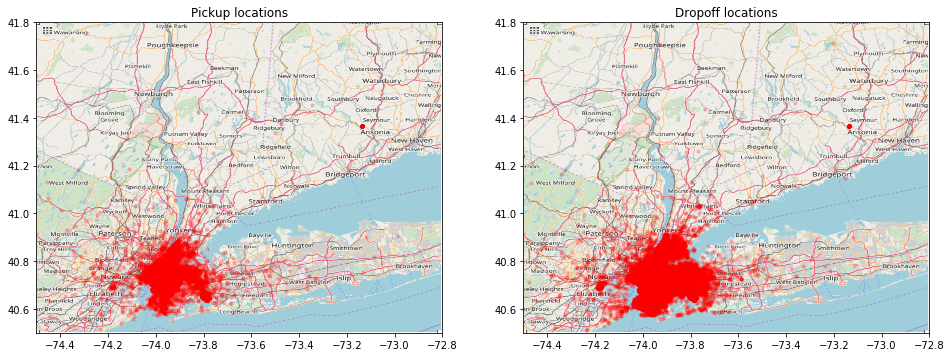

In [129]:
# トレーニングデータをマップにプロットする。
plot_on_map(sa_df_taxi, BB, nyc_map)

水の中のデータポイントが消えていることが確認できる。

## 平方マイルあたりのデータポイント密度
乗車と下車の位置の散布図は、直観的なデータの密度を示してくれる。しかし、面積当たりのデータポイント数のほうが、より正確に密度を可視化してくれる。下記のコードで、平方マイルあたりの乗車と下車の数をカウントする。これによって、「ホットスポット」が分かりやすくなる。

In [130]:
# このプロットと以降の分析では、ロケーション間の距離をlon, latから計算する関数が必要になる。
# この関数はこちらのものに基づく。 https://stackoverflow.com/questions/27928/
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# マイルで距離を返す。
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

# 最初に平方マイルのデータポイント密度を２つのアレイで計算する。
n_lon, n_lat = 200, 200 # 緯度、経度ごとのグリッドの数
density_pickup, density_dropoff = np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon)) # アレイの準備

# グリッドエリアのデータポイントの数を計算するため、numpy.digitize()を使用した。 
# この関数は、グリッドのマスごとのデータポイントを数えるため、グリッド数のアレイが必要になる。
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin
delta_lon = (BB[1]-BB[0]) / n_lon # bin longutide width
delta_lat = (BB[3]-BB[2]) / n_lat # bin latitude height
bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0]) / n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0]) / n_lat # bin height in miles
for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i * delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[2] + j * delta_lat
    
    # 緯度、経度の次元でデジタイズする。
inds_pickup_lon = np.digitize(sa_df_taxi.pickup_longitude, bins_lon)
inds_pickup_lat = np.digitize(sa_df_taxi.pickup_latitude, bins_lat)
inds_dropoff_lon = np.digitize(sa_df_taxi.dropoff_longitude, bins_lon)
inds_dropoff_lat = np.digitize(sa_df_taxi.dropoff_latitude, bins_lat)

# グリッドごとにカウント
# 注記：density_pickupが画像として表示されるとき、最初のインデックスはy方向、２番目のインデックスはx方向である。 
#       また、y軸は、適切に表示されるために逆方向に変換しなくてはんらない(なので、(n_lat-j)項がある。
dxdy = bin_width_miles * bin_height_miles
for i in range(n_lon):
    for j in range(n_lat):
        density_pickup[j, i] = np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==(n_lat-j))) / dxdy
        density_dropoff[j, i] = np.sum((inds_dropoff_lon==i+1) & (inds_dropoff_lat==(n_lat-j))) / dxdy

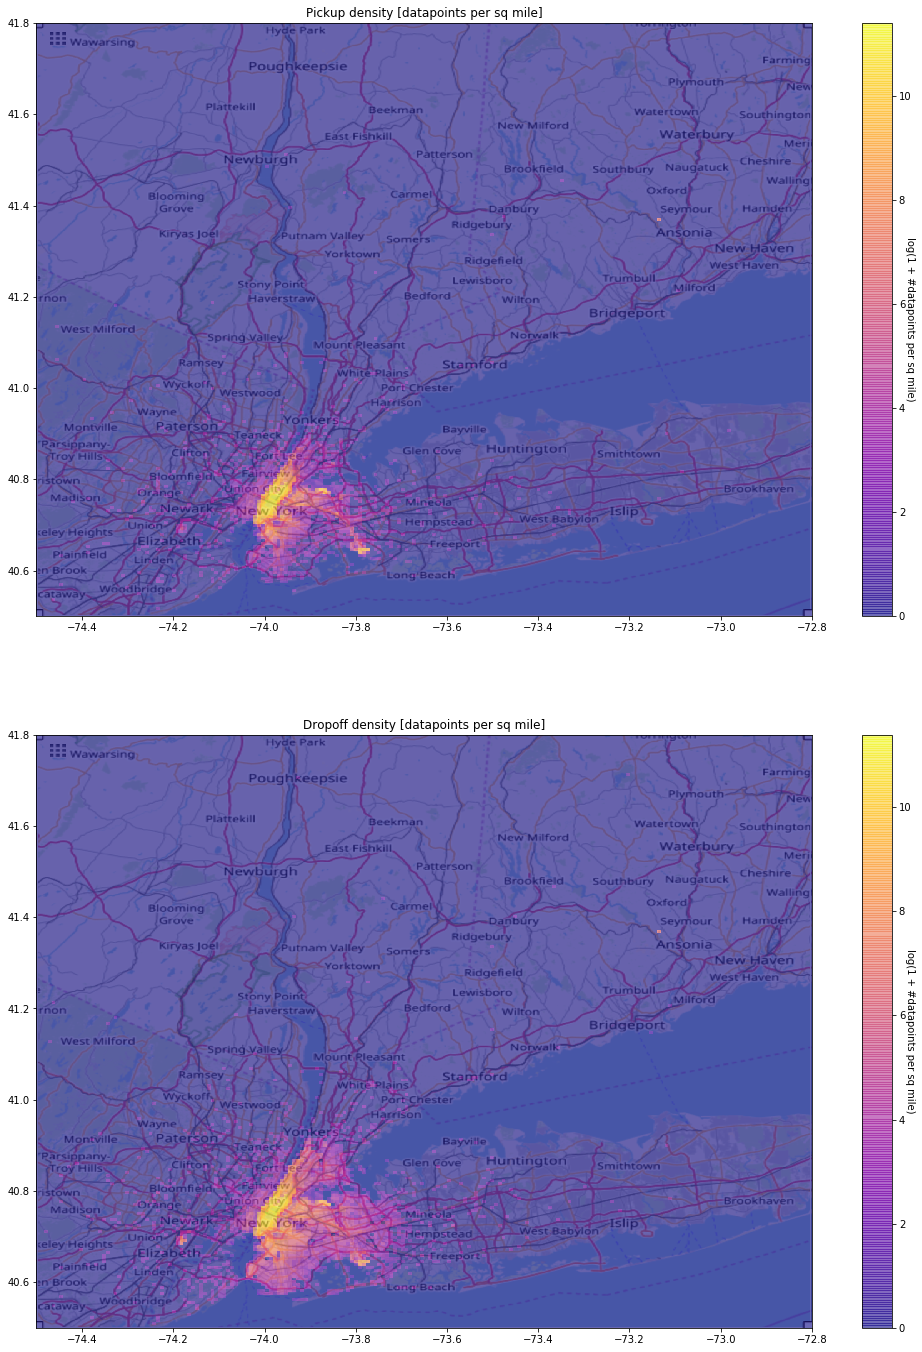

In [131]:
# 密度アレイをプロットする。
fig, axs = plt.subplots(2, 1, figsize=(18, 24))
axs[0].imshow(nyc_map, zorder=0, extent=BB);
im = axs[0].imshow(np.log1p(density_pickup), zorder=1, extent=BB, alpha=0.6, cmap='plasma')
axs[0].set_title('Pickup density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[0])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

axs[1].imshow(nyc_map, zorder=0, extent=BB);
im = axs[1].imshow(np.log1p(density_dropoff), zorder=1, extent=BB, alpha=0.6, cmap='plasma')
axs[1].set_title('Dropoff density [datapoints per sq mile]')
cbar = fig.colorbar(im, ax=axs[1])
cbar.set_label('log(1 + #datapoints per sq mile)', rotation=270)

これらのプロットから、マンハッタンと３つの空港（JFK, EWS, LGR)にデータポイントが集中していることが分かる。また、Seymour（右上隅）にもホットスポットがある。理由は不明

## 交通密度（渋滞度）

さらに、時間ごと（また年ごと）の交通密度を可視化出来れば面白いのではないかと考えた。単位面積当たりの乗車の数を数えれば、交通密度に関連する情報が分かる。交通量が多ければ、運転にかかる時間も長くなる。

In [132]:
sa_df_taxi['pickup_datetime']=pd.to_datetime(sa_df_taxi['pickup_datetime'])

In [133]:
sa_df_taxi.dtypes

Unnamed: 0                    int64
key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [134]:
# 時間の情報も加える
sa_df_taxi['year'] = sa_df_taxi.pickup_datetime.apply(lambda t: t.year)
sa_df_taxi['weekday'] = sa_df_taxi.pickup_datetime.apply(lambda t: t.weekday())
sa_df_taxi['hour'] = sa_df_taxi.pickup_datetime.apply(lambda t: t.hour)

In [135]:
# 乗車時の交通密度を計算するための定数設定
n_hours = 24
n_weekdays = 7
n_years = 7
n_bins_lon = 30
n_bins_lat = 30

# マンハッタンの交通にフォーカスする
BB_traffic = (-74.025, -73.925, 40.7, 40.8)

# ピックアップの交通密度を計算するための関数を定義
def calculate_trafic_density(df):
    traffic = np.zeros((n_years, n_weekdays, n_hours, n_bins_lat, n_bins_lon))
    
    # グリッド領域のデータポイントの数を計算するために、numpy.digitize()を使用する。
    bins_lon = np.zeros(n_bins_lon+1) # bin
    bins_lat = np.zeros(n_bins_lat+1) # bin
    
    delta_lon = (BB_traffic[1]-BB_traffic[0]) / n_bins_lon # bin longutide width
    delta_lat = (BB_traffic[3]-BB_traffic[2]) / n_bins_lat # bin latitude height
    
    for i in range(n_bins_lon+1):
        bins_lon[i] = BB_traffic[0] + i * delta_lon
    for j in range(n_bins_lat+1):
        bins_lat[j] = BB_traffic[2] + j * delta_lat
    
    # グリッドごとにカウントする。
    
    for y in range(n_years):
        for d in range(n_weekdays):
            for h in range(n_hours):
                idx = (df.year==(2009+y)) & (df.weekday==d) & (df.hour==h)

                # Digitize per longitude, latitude dimension
                inds_pickup_lon = np.digitize(df[idx].pickup_longitude, bins_lon)
                inds_pickup_lat = np.digitize(df[idx].pickup_latitude, bins_lat)

                for i in range(n_bins_lon):
                    for j in range(n_bins_lat):
                        traffic[y, d, h, j, i] = traffic[y, d, h, j, i] + \
                                                 np.sum((inds_pickup_lon==i+1) & (inds_pickup_lat==j+1))
    
    return traffic 

# 乗車の交通密度をプロットする関数を定義
def plot_traffic(traffic, y, d):
    days = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
    fig, axs = plt.subplots(3,8,figsize=(18,7))
    axs = axs.ravel()
    for h in range(24):
        axs[h].imshow(traffic[y-2009,days[d],h,::-1,:], zorder=1, cmap='coolwarm', clim=(0, traffic.max()))
        axs[h].get_xaxis().set_visible(False)
        axs[h].get_yaxis().set_visible(False)
        axs[h].set_title('h={}'.format(h))
    fig.suptitle("Pickup traffic density, year={}, day={} (max_pickups={})".format(y, d, traffic.max()))

交通密度のプロットを描画する。 <br>

NOTE: プロットの品質は、データポイントの数に依存する。ここでは500kポイントのデータしか使用していないため、よい交通密度プロットを描くには不足している。

In [136]:
traffic = calculate_trafic_density(sa_df_taxi)

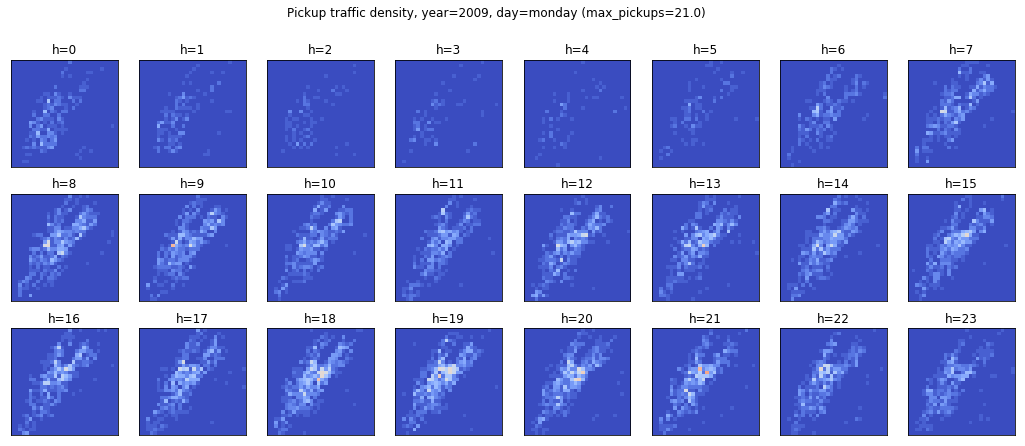

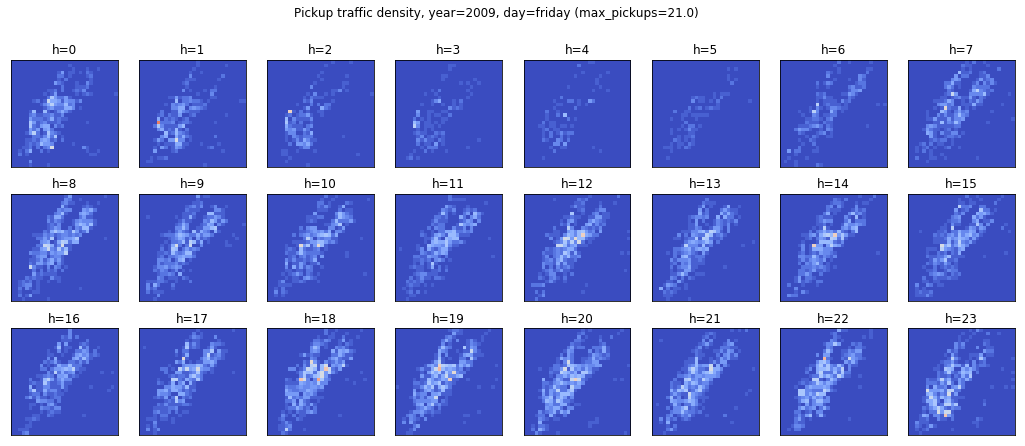

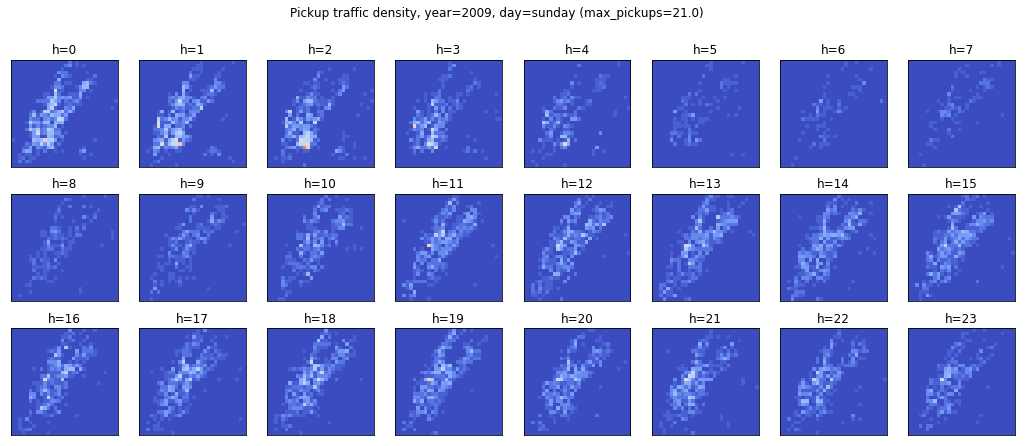

In [137]:
plot_traffic(traffic, 2009, 'monday')
plot_traffic(traffic, 2009, 'friday')
plot_traffic(traffic, 2009, 'sunday')

これらのプロットから、時間ごとに交通密度に異なったパターンが現れるのが分かるが、ロケーションによっても異なる。例えば、日曜日のh=0-3時は、平日の同じ時間より交通量が多い。 <br>

別の年でも見てみよう。

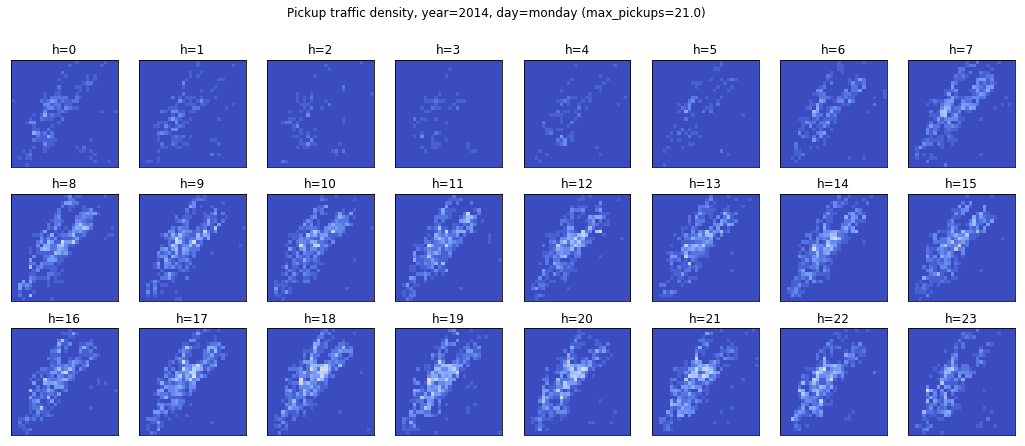

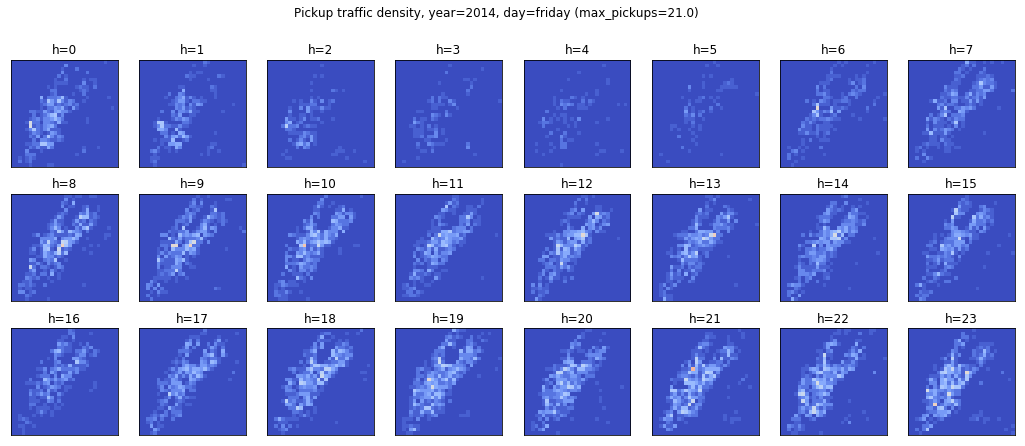

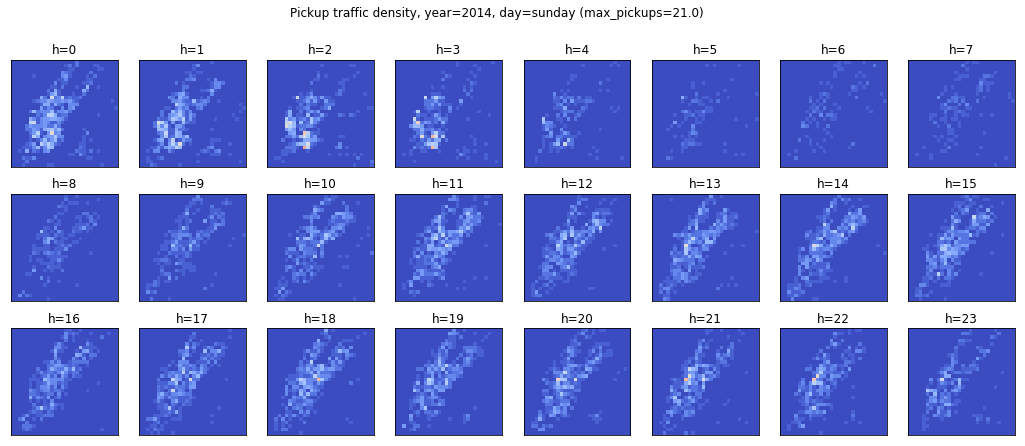

In [138]:
plot_traffic(traffic, 2014, 'monday')
plot_traffic(traffic, 2014, 'friday')
plot_traffic(traffic, 2014, 'sunday')


## 距離と時間の可視化

モデルを作成する前に、いくつか仮説検証したい。 < br>

乗車距離が長いほうが、運賃は高いはずである。 <br>
空港の行き来のようないくつかの経路は、固定運賃である。 <br>
夜の運賃は、昼とは異なる。 <br>

検証してみよう <br>

距離と運賃の関係を可視化することから始める。

count    542359.000000
mean          2.069028
std           2.319057
min           0.000000
25%           0.779644
50%           1.335844
75%           2.431540
max          79.044954
Name: distance_miles, dtype: float64

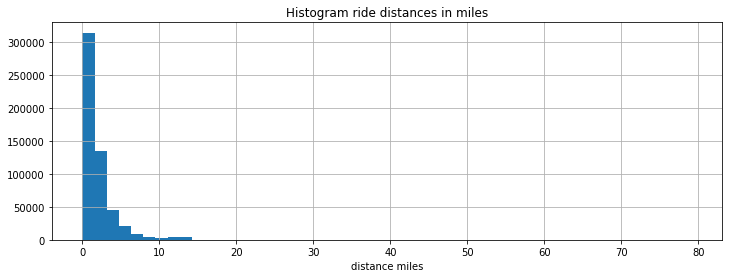

In [140]:
# マイル距離を表すコラムを新たに付け加える。
sa_df_taxi['distance_miles'] = distance(sa_df_taxi.pickup_latitude, sa_df_taxi.pickup_longitude, \
                                      sa_df_taxi.dropoff_latitude, sa_df_taxi.dropoff_longitude)

sa_df_taxi.distance_miles.hist(bins=50, figsize=(12,4))
plt.xlabel('distance miles')
plt.title('Histogram ride distances in miles')
sa_df_taxi.distance_miles.describe()

大部分の乗車は短距離の乗車である。１３マイルほどの小さなピークがあるが、これは空港の送迎である。　<br>
次に'passenser_count'の影響を見よう。

In [141]:
sa_df_taxi.groupby('passenger_count')['distance_miles', 'fare_amount'].mean()

distance_miles  fare_amount
passenger_count                             
0                      1.794503     9.081957
1                      2.044695    11.223668
2                      2.180916    11.793182
3                      2.099984    11.521192
4                      2.114499    11.644260
5                      2.056945    11.157648
6                      2.055792    11.883799

０人の乗車数は、タクシーがモノを運んでいるのか、管理上のエラーだろうか？運賃が非常に小さいので、後者ではなさそうである。 <br>
'fare_amount'の代わりに'fare per mile'を使うと違った示唆が得られる。

In [142]:
print("Average $USD/Mile : {:0.2f}".format(sa_df_taxi.fare_amount.sum()/sa_df_taxi.distance_miles.sum()))

Average $USD/Mile : 5.48


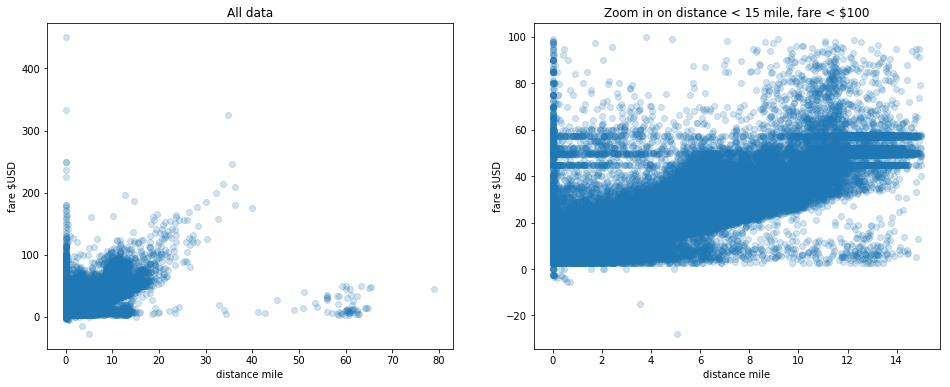

In [143]:
# 距離-運賃散布図
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(sa_df_taxi.distance_miles, sa_df_taxi.fare_amount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# データのある部分を拡大
idx = (sa_df_taxi.distance_miles < 15) & (sa_df_taxi.fare_amount < 100)
axs[1].scatter(sa_df_taxi[idx].distance_miles, sa_df_taxi[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 15 mile, fare < $100');

このプロットから分かることは: <br

乗車距離0でも乗車賃が発生しているケースがある。これは乗車地点と下車地点が同じものだろうか。この運賃を予測するのは、データセット内に十分な情報がないので難しいだろう。 <br>
５０マイル以上乗っているのに低い運賃のケースもある。これらは割引乗車なのだろうか。もしくは上で述べたSeymour周辺のホットスポットなのだろうか。 <br>
右のプロットの水平のラインは、JKF空港送迎の固定運賃とも考えられる。 <br>
全体としてみれば、距離と運賃は5 USD/mile程度の線形な関係があると思われる。 <br>
NYCのタクシー運賃についてグーグルで調べると、 <br>

乗車距離3kmでは$4.00 – $10.00 (https://www.priceoftravel.com/555/world-taxi-prices-what-a-3-kilometer-ride-costs-in-72-big-cities/) <br>
初乗り: $2.50 - $3.30, 乗車距離1kmにつき : $1.55 - $2.98 (https://www.numbeo.com/taxi-fare/in/New-York) <br>
タクシー価格の詳細: http://home.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml <br>
空港を除いたほとんどの初乗り運賃は$2.5である。そこに単位距離(=1/5マイル)ごとに$0.5ずつチャージされる。 <br>
8PM-6AMは、$0.5が加算される。 <br> 

平日のピークアワー(4PM-8PM)は、１ドル加算される。 <br>

ニューヨークシティ、ナッソー、サフォーク、ウエストチェスター、ロックランド、ダッチェス、オレンジ、パットナムでは、MTA州税が$0.5かかる。 <br> 

$0.3の修正サーチャージがある。 <br>

注：このデータセットで計算している距離はポイントtoポイントなので、道路ベースで計算した距離はもっと大きい。 <br>

In [144]:
# 0.05マイル未満のデータポイントは削除する。
idx = (sa_df_taxi.distance_miles >= 0.05)
print('Old size: %d' % len(sa_df_taxi))
sa_df_taxi = sa_df_taxi[idx]
print('New size: %d' % len(sa_df_taxi))


Old size: 542359
New size: 533816


## 空港の送迎などいくつかの乗車は固定運賃
このデータを探索する他の手段としては、有名な場所の行きかえりの乗車である。例えば、空港の送迎は、距離にもよるが、大体固定運賃である。

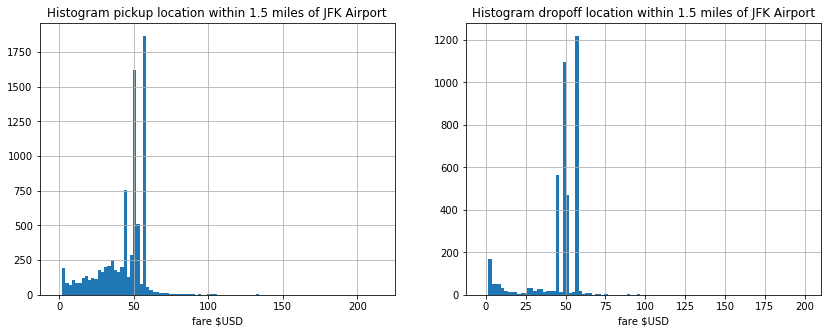

In [145]:
# JFK空港の座標 https://www.travelmath.com/airport/JFK　参照。
jfk = (-73.7822222222, 40.6441666667)
nyc = (-74.0063889, 40.7141667)

def plot_location_fare(loc, name, range=1.5):
    # 空港の範囲の降車地点のすべてのデータポイントを選択
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    idx = (distance(df_train.pickup_latitude, df_train.pickup_longitude, loc[1], loc[0]) < range)
    df_train[idx].fare_amount.hist(bins=100, ax=axs[0])
    axs[0].set_xlabel('fare $USD')
    axs[0].set_title('Histogram pickup location within {} miles of {}'.format(range, name))

    idx = (distance(df_train.dropoff_latitude, df_train.dropoff_longitude, loc[1], loc[0]) < range)
    df_train[idx].fare_amount.hist(bins=100, ax=axs[1])
    axs[1].set_xlabel('fare $USD')
    axs[1].set_title('Histogram dropoff location within {} miles of {}'.format(range, name));
    
plot_location_fare(jfk, 'JFK Airport')

空港の送迎に関して、いくつかの固定運賃があるように伺える。払いすぎている人も数人いるようだ($140?) <br> 
他の空港も見てみよう。

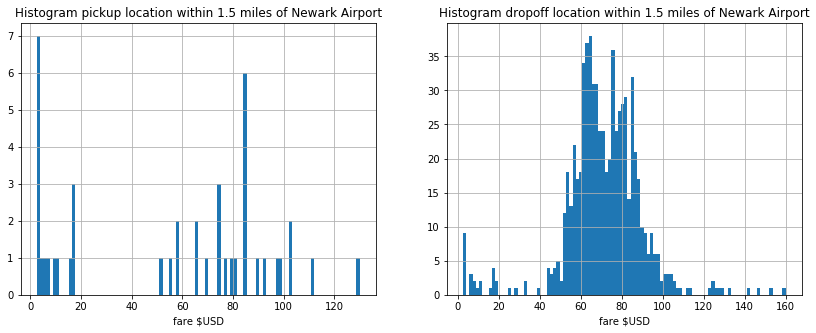

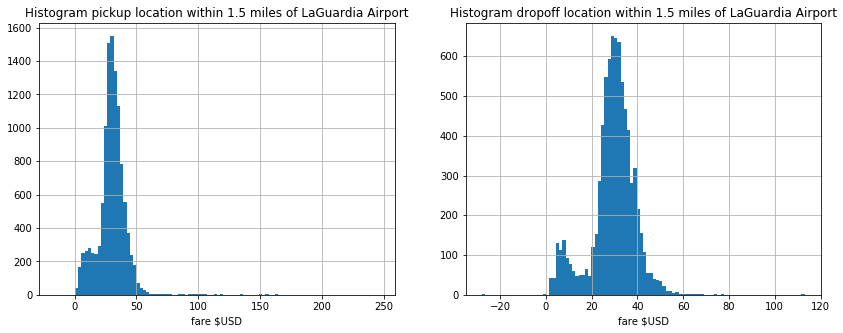

In [146]:
ewr = (-74.175, 40.69) # Newark Liberty International Airport, see https://www.travelmath.com/airport/EWR
lgr = (-73.87, 40.77) # LaGuardia Airport, see https://www.travelmath.com/airport/LGA
plot_location_fare(ewr, 'Newark Airport')
plot_location_fare(lgr, 'LaGuardia Airport')

## 夜間運賃は昼とは異なる。
時間と運賃/kmの関係を見るために、いくつか新しいコラムを加える。

In [147]:
sa_df_taxi['fare_per_mile'] = sa_df_taxi.fare_amount / sa_df_taxi.distance_miles
sa_df_taxi.fare_per_mile.describe()

count    533816.000000
mean          7.420747
std          12.022732
min         -29.328754
25%           4.768821
50%           6.124373
75%           8.090221
max        2045.652292
Name: fare_per_mile, dtype: float64

最大運賃 USD/mileは非常に大きいように思える。これは距離か運賃のデータの誤りであろう。さて、この関係をさらに分析しよう。 <br> 
一般にタクシーの運賃は下記のように計算できる。 <br>

yfare=θ0+θ1⋅xdistance+θ2⋅xduration
 
with  θ0  初乗り運賃、  xdistance 乗車距離、xduration 乗車時間 <br>
書き直すと下記になる。 <br> 

yfare/xdistance=θ0/xdistance+θ1+θ2⋅xduration/xdistance
 
短い距離では、乗車距離と乗車時間は、平均速度に比例すると考えられるので、。 <br>
xdistance=c⋅xduration  with  c  平均速度 <br>
すると、<br>

yfare/xdistance=θ0/xdistance+θ1+θ2c⋅xdurationxduration=θ0/xdistance+θ′1
 
with  θ′1=θ1+θ2/c .

結論としては、距離あたりの運賃は、1/distance_mileに比例するといえる。これをグラフにしてみよう。

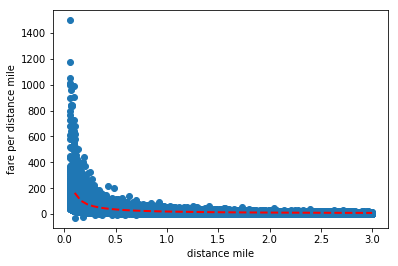

In [148]:
idx = (sa_df_taxi.distance_miles < 3) & (sa_df_taxi.fare_amount < 100)
plt.scatter(sa_df_taxi[idx].distance_miles, sa_df_taxi[idx].fare_per_mile)
plt.xlabel('distance mile')
plt.ylabel('fare per distance mile')

# このシータは手での見積もり
theta = (16, 4.0)
x = np.linspace(0.1, 3, 50)
plt.plot(x, theta[0]/x + theta[1], '--', c='r', lw=2);

距離ごとの運賃は、短距離(<0.5mile)でよりばらつく。この一つの理由は、このデータセットでは距離をポイントtoポイントで図っているため、短距離では道路ベースでの距離とのばらつきが大きいことが考えられる。もう一つの理由としては、ラッシュアワーで渋滞が起きていたりすると、短距離では乗車時間と乗車距離のかい離が大きくなるためということが考えられる。深層学習のようなモデルではリニアモデルより精度改善が期待できるかもしれない。 <br>

時間と運賃の関係をさらに調べてみよう。

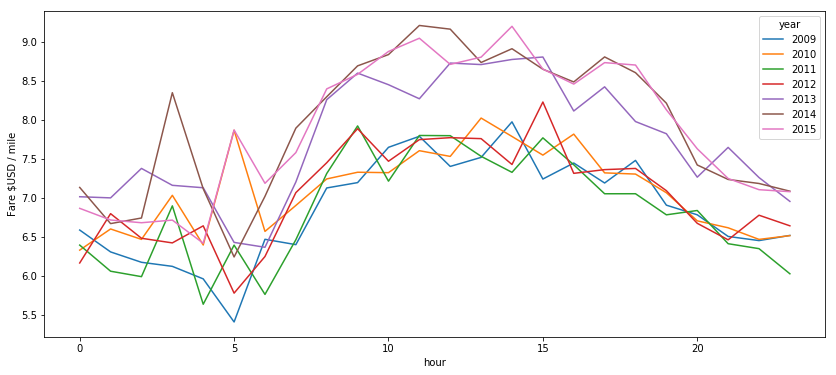

In [149]:
# ピボットテーブルの表示
sa_df_taxi.pivot_table('fare_per_mile', index='hour', columns='year').plot(figsize=(14,6))
plt.ylabel('Fare $USD / mile');


USD/mileの運賃は、時間で変化し、年ごとにも異なることがよくわかる。 <br>

更に分析するために、グーグルマップから２つのケースの予測乗車時間を計算した： <br>
    
Trip 1 : ＮＹＣの美術館からビーコンシアターまで4.5km、マンハッタンから出ない。 <br>
Trip 2 : タイムズスクエアからマリアハーマンデズ公園まで12km、タイムズスクエアを出て、クイーンズミッドタウントンネル（有料）を通る。 <br>
下記はデータとグラフである。同じグラフの形になっている。つまり、交通量が乗車時間を決め、運賃を決めると言える。一方、交通量は、１日の時間帯によっても異なる。

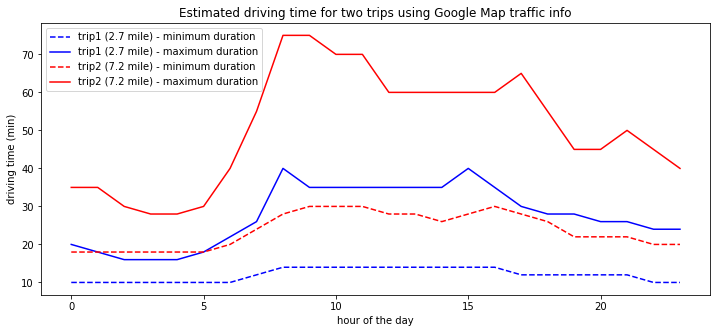

In [150]:
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, \
         13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# minimum & maximum duration in minutes
trip1_min = [10, 10, 10, 10, 10, 10, 10, 12, 14, 14, 14, 14, \
             14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 10, 10]
trip1_max = [20, 18, 16, 16, 16, 18, 22, 26, 40, 35, 35, 35, \
             35, 35, 35, 40, 35, 30, 28, 28, 26, 26, 24, 24]

trip2_min = [18, 18, 18, 18, 18, 18, 20, 24, 28, 30, 30, 30, \
             28, 28, 26, 28, 30, 28, 26, 22, 22, 22, 20, 20]
trip2_max = [35, 35, 30, 28, 28, 30, 40, 55, 75, 75, 70, 70, \
             60, 60, 60, 60, 60, 65, 55, 45, 45, 50, 45, 40]

plt.figure(figsize=(12, 5))
plt.plot(hours, trip1_min, '--', c='b', label="trip1 (2.7 mile) - minimum duration")
plt.plot(hours, trip1_max, '-', c='b', label="trip1 (2.7 mile) - maximum duration")
plt.plot(hours, trip2_min, '--', c='r', label="trip2 (7.2 mile) - minimum duration")
plt.plot(hours, trip2_max, '-', c='r', label="trip2 (7.2 mile) - maximum duration")
plt.xlabel('hour of the day')
plt.ylabel('driving time (min)')
plt.title('Estimated driving time for two trips using Google Map traffic info')
plt.legend();

更に深い運賃/時間依存性分析を下に示す。ここで、年あたり、時間当たりの運賃を計算して、線形回帰を使った。 <br>
このプロットを見ると、価格は年ごとに増加していることが分かる。

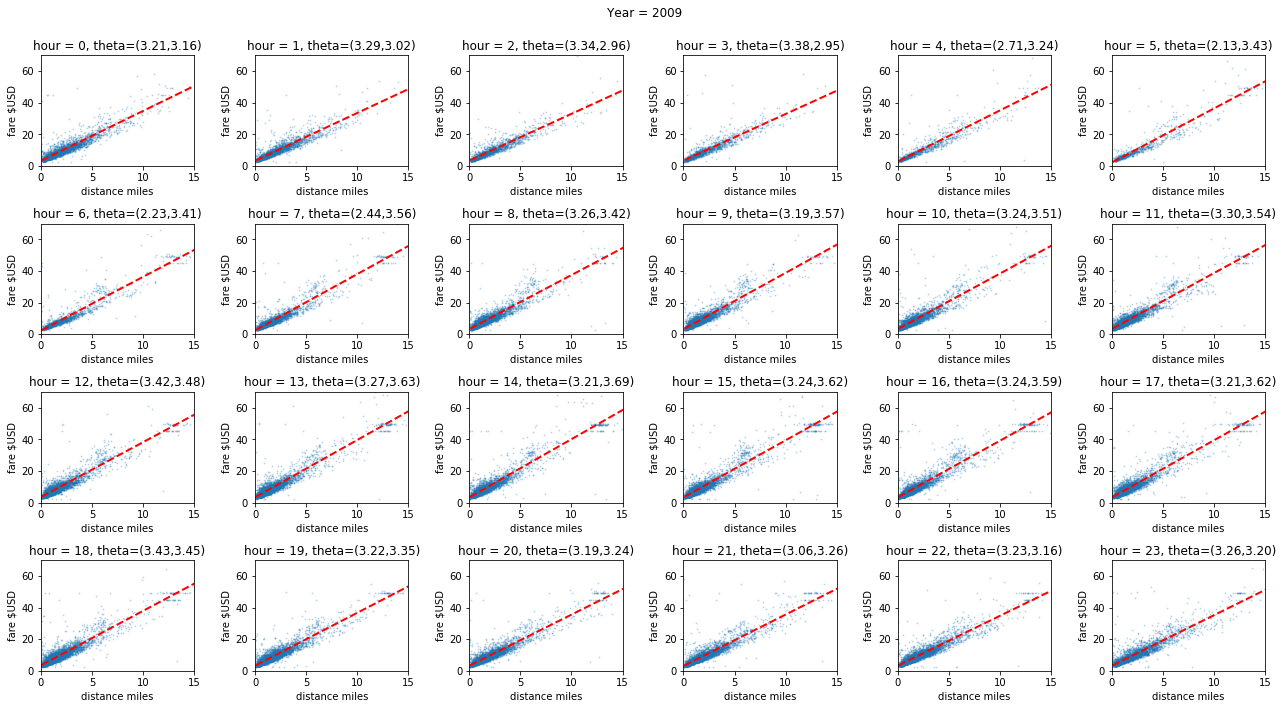

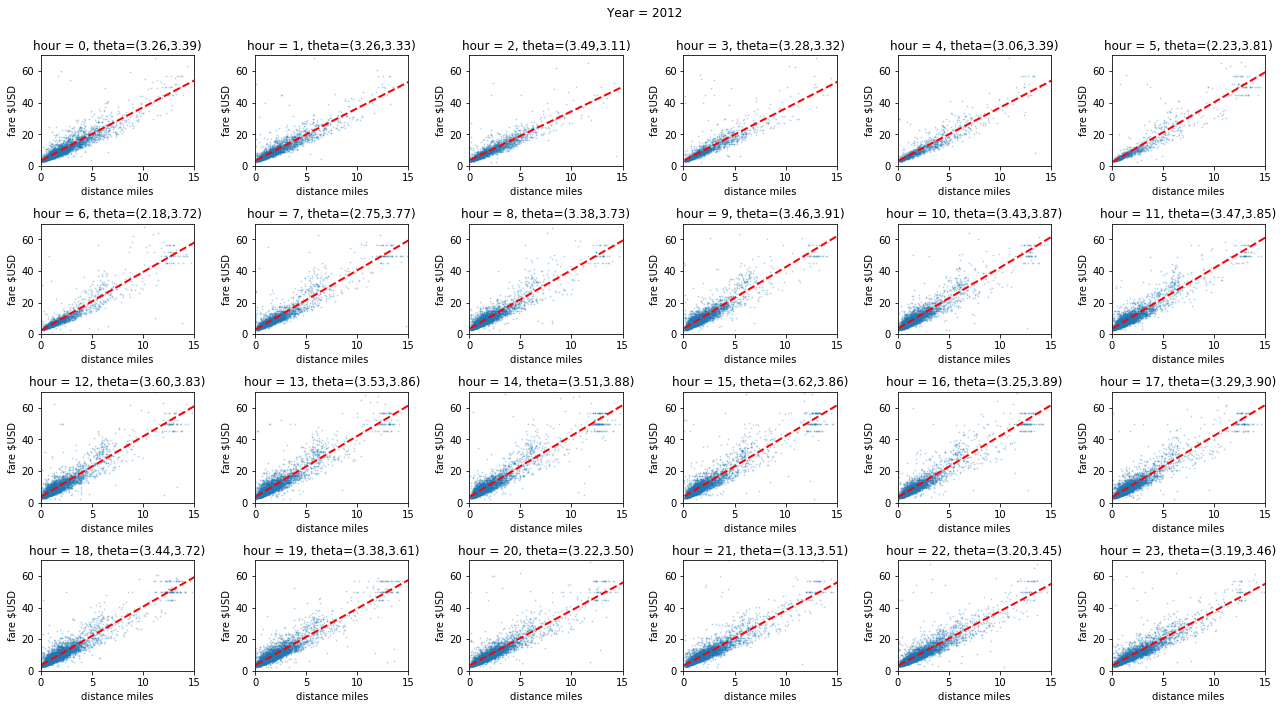

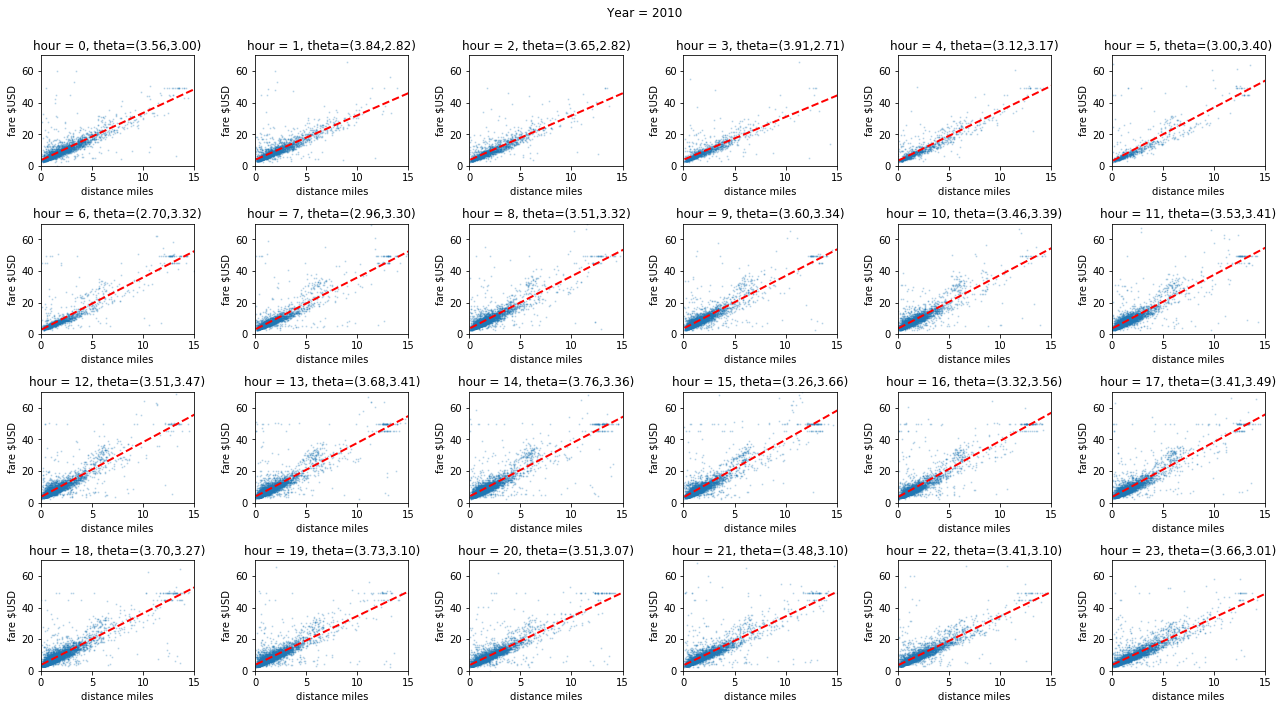

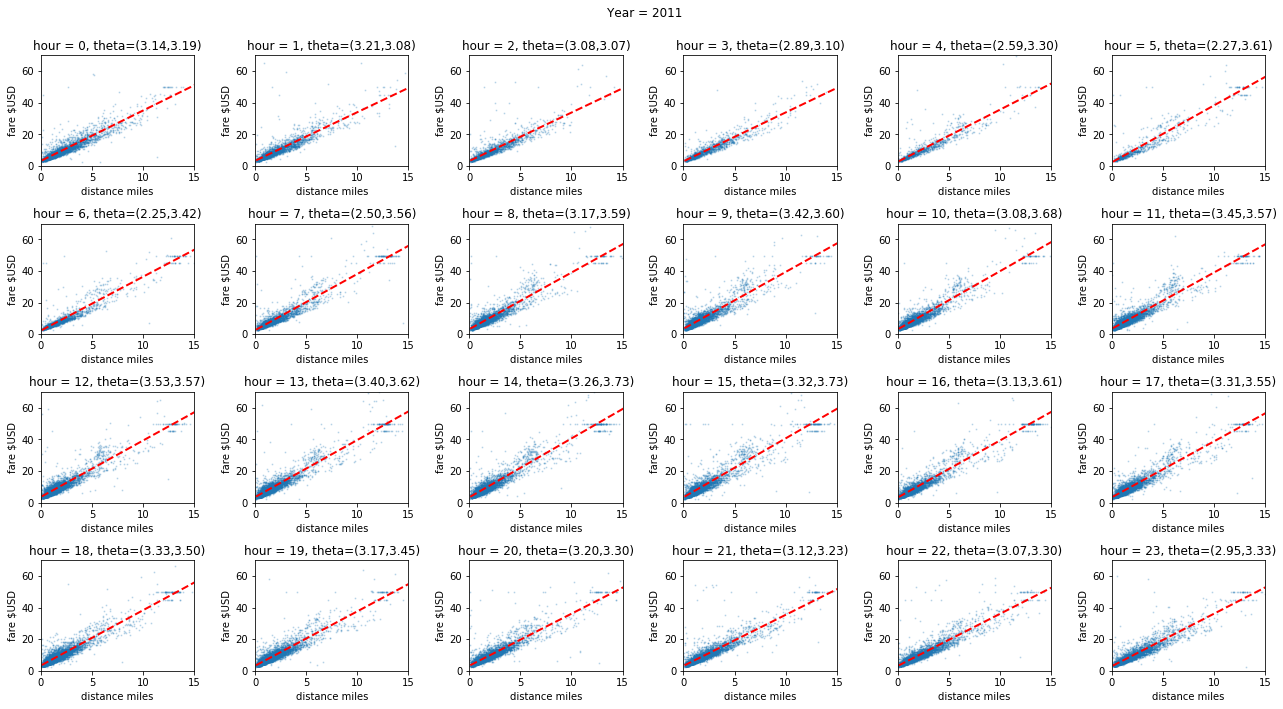

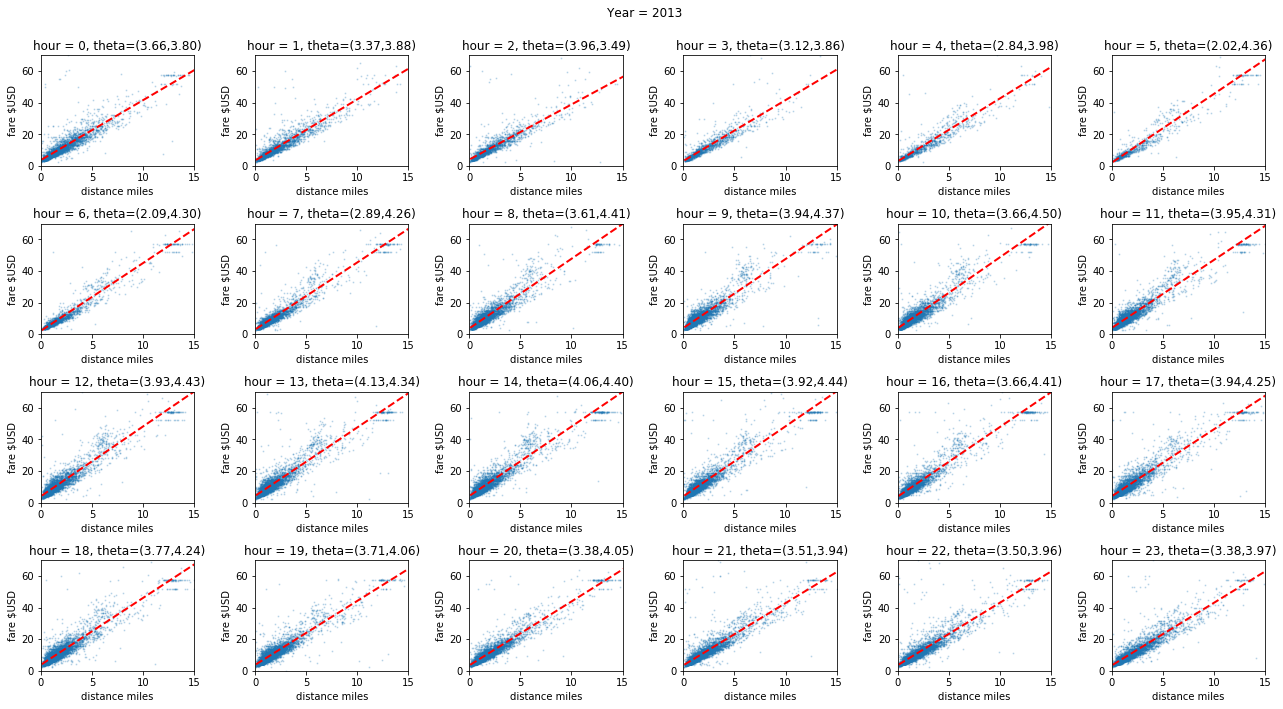

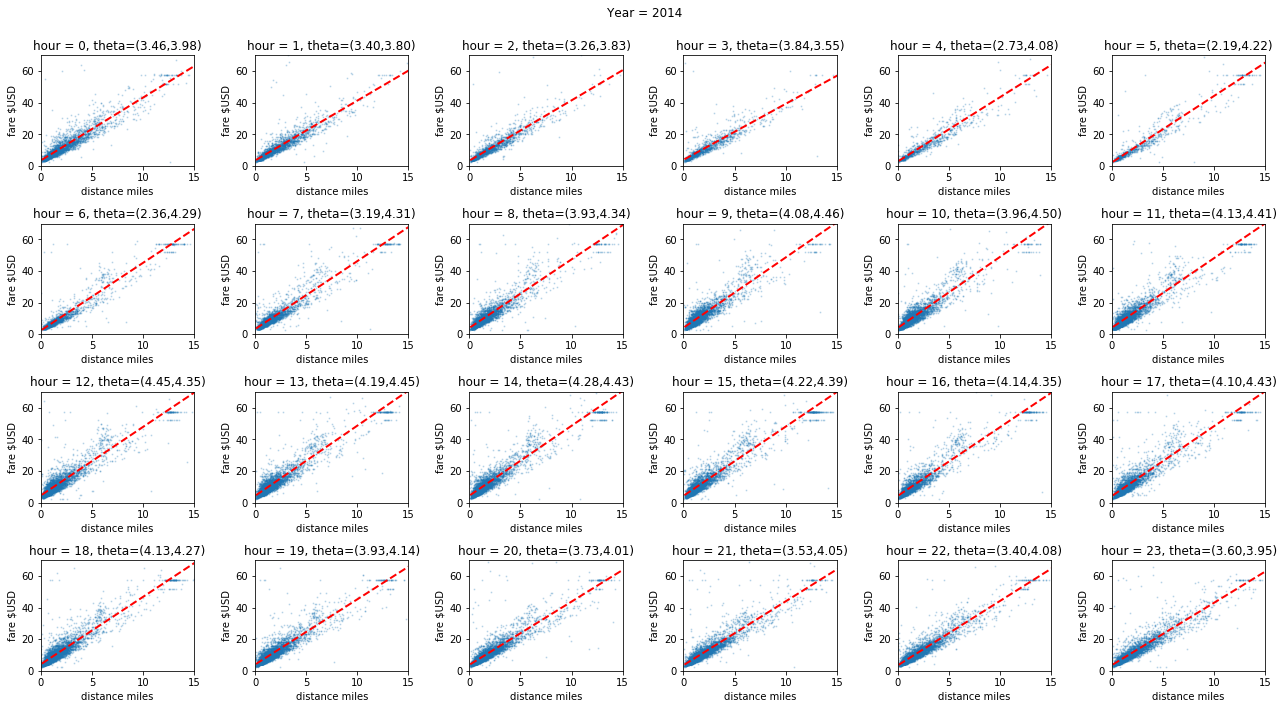

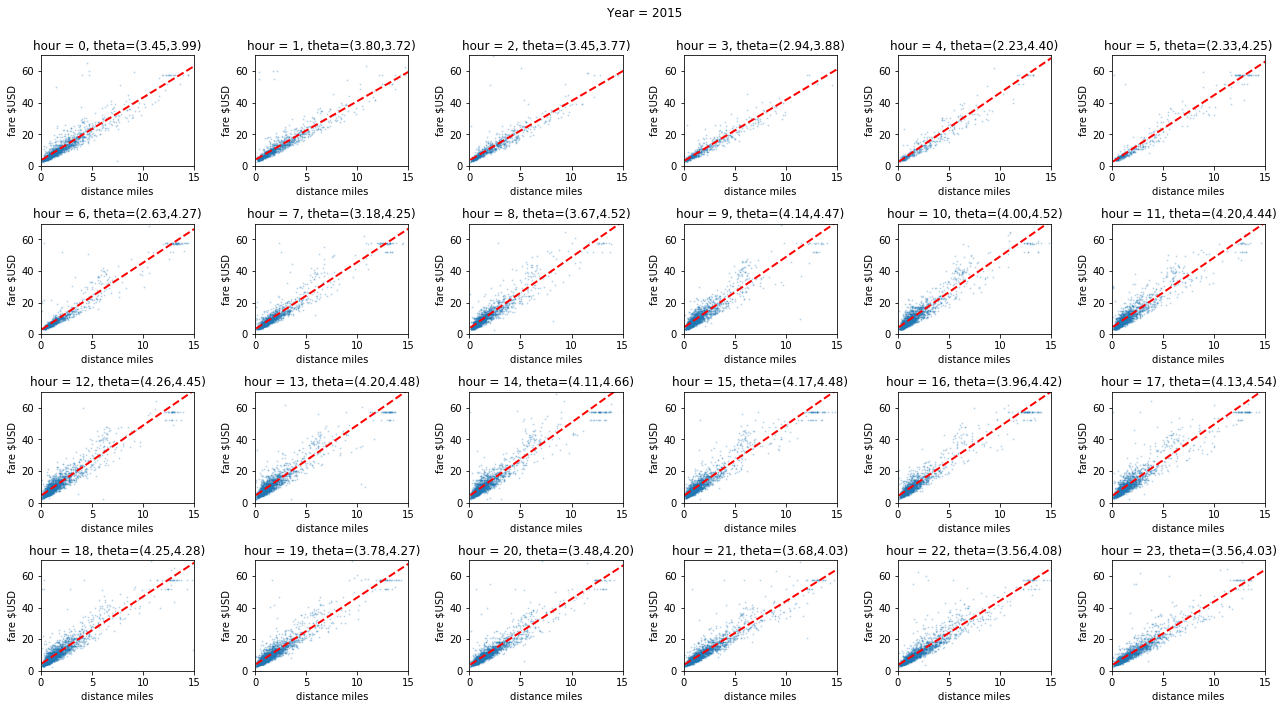

In [151]:
from sklearn.linear_model import LinearRegression

# すべての年でプロットする
for year in sa_df_taxi.year.unique():
    # 図を作る
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    # すべての時間でプロットする
    for h in range(24):
        idx = (sa_df_taxi.distance_miles < 15) & (sa_df_taxi.fare_amount < 100) & (sa_df_taxi.hour == h) & \
              (sa_df_taxi.year == year)
        axs[h].scatter(sa_df_taxi[idx].distance_miles, sa_df_taxi[idx].fare_amount, alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))

        model = LinearRegression(fit_intercept=False)
        x, y = sa_df_taxi[idx].distance_miles.values.reshape(-1,1), sa_df_taxi[idx].fare_amount.values.reshape(-1,1)
        X = np.concatenate((np.ones(x.shape), x), axis=1)
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.coef_[0][0] + xx * model.coef_[0][1], '--', c='r', lw=2)
        axs[h].set_title('hour = {}, theta=({:0.2f},{:0.2f})'.format(h, model.coef_[0][0], model.coef_[0][1]))

    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

## 運賃は、乗車地点で変わる
距離あたり運賃がニューヨークの中心からの位置によって変わるかを計算した。

In [152]:
# add new column to dataframe with distance in mile
sa_df_taxi['distance_to_center'] = distance(nyc[1], nyc[0], sa_df_taxi.pickup_latitude, sa_df_taxi.pickup_longitude)

NYCセンターまでの距離と、乗車距離、運賃の関係のプロットは、この複雑な関係にいくつかの示唆を与える。

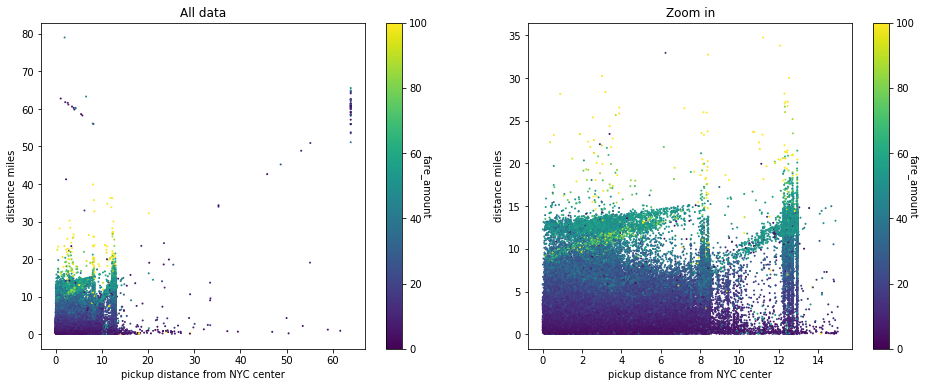

In [153]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(sa_df_taxi.distance_to_center, sa_df_taxi.distance_miles, c=np.clip(sa_df_taxi.fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx = (sa_df_taxi.distance_to_center < 15) & (sa_df_taxi.distance_miles < 35)
im = axs[1].scatter(sa_df_taxi[idx].distance_to_center, sa_df_taxi[idx].distance_miles, 
                     c=np.clip(sa_df_taxi[idx].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

たくさんのグリーンのドットがあるが、これはNYCセンターから13マイルの$50-$60の運賃のものである。これはJFK空港からの行きかえりのものであろう。これらを除くとどのようなことが分かるか見てみよう。

In [154]:
sa_df_taxi['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0], sa_df_taxi.pickup_latitude, sa_df_taxi.pickup_longitude)
sa_df_taxi['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0], sa_df_taxi.dropoff_latitude, sa_df_taxi.dropoff_longitude)

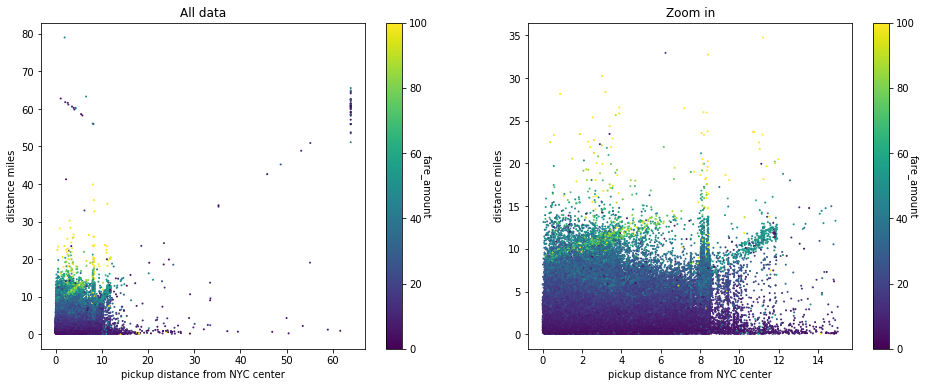

In [155]:
# すべてのJFK空港関連のプロットを除く
idx = ~((sa_df_taxi.pickup_distance_to_jfk < 1) | (sa_df_taxi.dropoff_distance_to_jfk < 1))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(sa_df_taxi[idx].distance_to_center, sa_df_taxi[idx].distance_miles, 
                    c=np.clip(sa_df_taxi[idx].fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx1 = idx & (sa_df_taxi.distance_to_center < 15) & (sa_df_taxi.distance_miles < 35)
im = axs[1].scatter(sa_df_taxi[idx1].distance_to_center, sa_df_taxi[idx1].distance_miles, 
                     c=np.clip(sa_df_taxi[idx1].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

イエローのドット（fare amount > $80)が残るので、これらが何かを理解するためにマップにプロットしてみる。

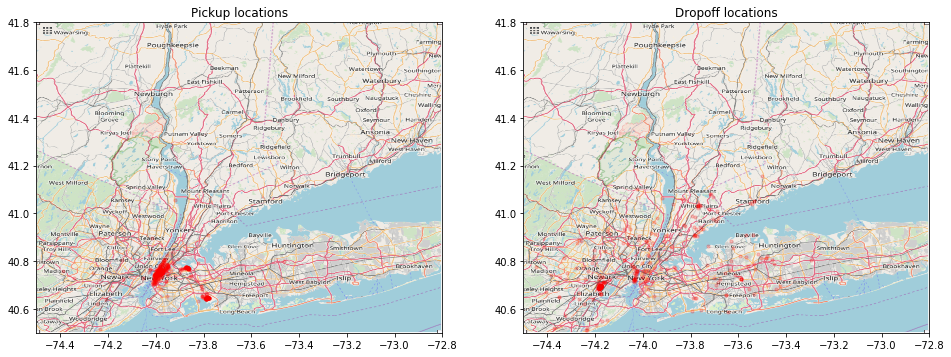

In [156]:
idx = (sa_df_taxi.fare_amount>80) & (sa_df_taxi.distance_miles<35) 
plot_on_map(sa_df_taxi[idx], BB, nyc_map)

降車地点(-74.2, 40.65)の近くに、データポイントが集中しているように見える。グーグルマップで確認すると、ここはニューアーク空港付近である。この空港の行きかえりの運賃は、80-100USDである。 <br>

これらのデータポイントも削除してみよう。そして、ラガーディア空港の関するデータポイントも削除してみよう。

In [159]:
sa_df_taxi['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], sa_df_taxi.pickup_latitude, sa_df_taxi.pickup_longitude)
sa_df_taxi['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0], sa_df_taxi.dropoff_latitude, sa_df_taxi.dropoff_longitude)
sa_df_taxi['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0], sa_df_taxi.pickup_latitude, sa_df_taxi.pickup_longitude)
sa_df_taxi['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0], sa_df_taxi.dropoff_latitude, sa_df_taxi.dropoff_longitude)

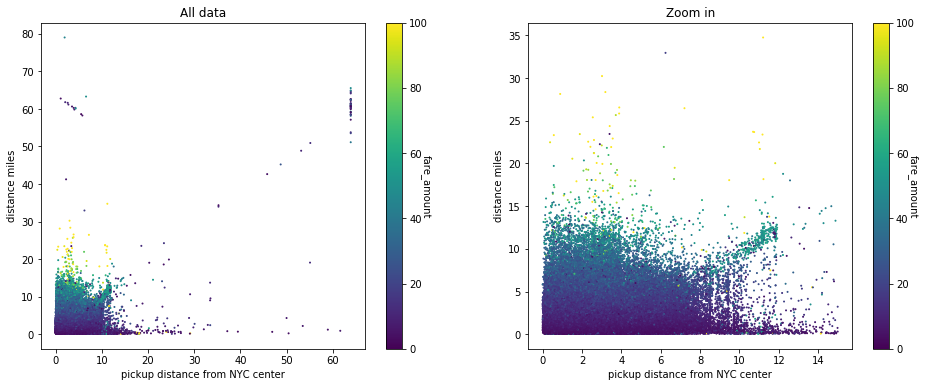

In [161]:
# すべての空港までの行きかえりを削除する。
idx = ~((sa_df_taxi.pickup_distance_to_jfk < 1) | (sa_df_taxi.dropoff_distance_to_jfk < 1) |
        (sa_df_taxi.pickup_distance_to_ewr < 1) | (sa_df_taxi.dropoff_distance_to_ewr < 1) |
        (sa_df_taxi.pickup_distance_to_lgr < 1) | (sa_df_taxi.dropoff_distance_to_lgr < 1))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(sa_df_taxi[idx].distance_to_center, sa_df_taxi[idx].distance_miles, 
                    c=np.clip(sa_df_taxi[idx].fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx1 = idx & (sa_df_taxi.distance_to_center < 15) & (sa_df_taxi.distance_miles < 35)
im = axs[1].scatter(sa_df_taxi[idx1].distance_to_center, sa_df_taxi[idx1].distance_miles, 
                     c=np.clip(sa_df_taxi[idx1].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

空港の行きかえりを除くと、データはより「線形」にみえる。運賃は距離に依存し、スタート位置にはあまり依存していない。

## 運賃の方向との関係
ここまでは、運賃の予測の主な特徴量として、乗車の総合距離を考えていた。しかし、走行方向は関係はあるだろうか。これを見るために、緯度と経度、運賃のデルタをプロットするところから始める。

C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log1p
  # Remove the CWD from sys.path while we load stuff.


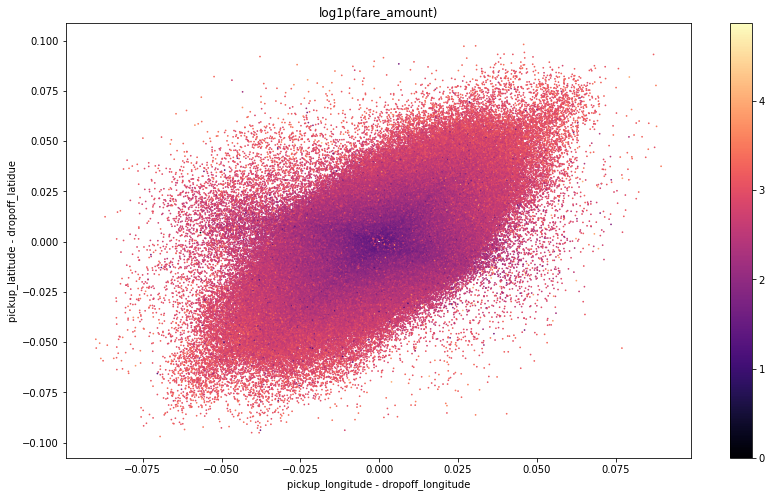

In [164]:
sa_df_taxi['delta_lon'] = sa_df_taxi.pickup_longitude - sa_df_taxi.dropoff_longitude
sa_df_taxi['delta_lat'] = sa_df_taxi.pickup_latitude - sa_df_taxi.dropoff_latitude

# Select trips in Manhattan
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(sa_df_taxi, BB_manhattan)

plt.figure(figsize=(14,8))
plt.scatter(sa_df_taxi[idx_manhattan].delta_lon, sa_df_taxi[idx_manhattan].delta_lat, s=0.5, alpha=1.0, 
            c=np.log1p(sa_df_taxi[idx_manhattan].fare_amount), cmap='magma')
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latidue')
plt.title('log1p(fare_amount)');

このプロットからは、方向は関係があるように見える。そこで、正確な方向と運賃をプロットしてみよう。

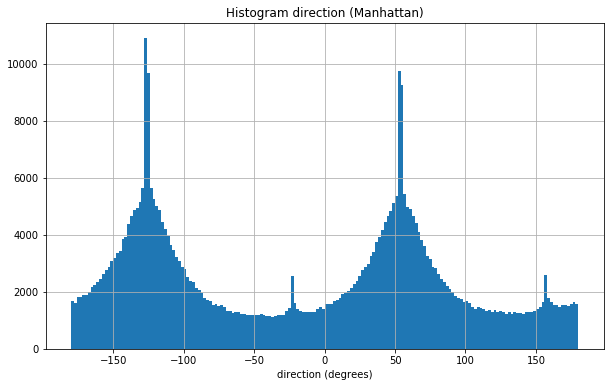

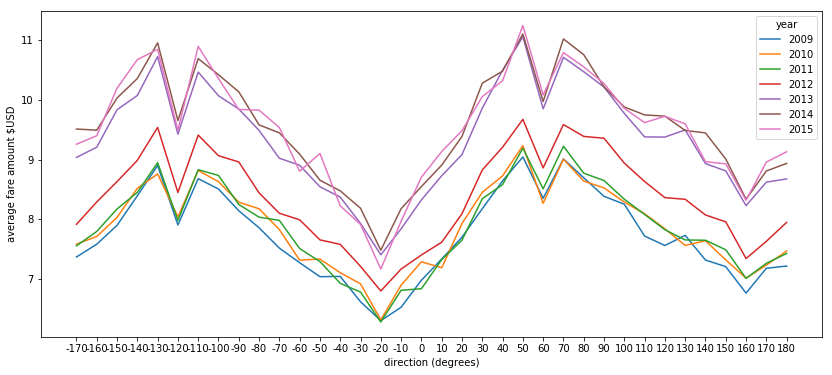

In [165]:
# 走行の方向を180度から-180度まで計算する。平行な軸が0度である。
def calculate_direction(d_lon, d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2 + d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    idx = (d_lon<0) & (d_lat>0)
    result[idx] = 180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    idx = (d_lon<0) & (d_lat<0)
    result[idx] = -180 - (180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

sa_df_taxi['direction'] = calculate_direction(sa_df_taxi.delta_lon, sa_df_taxi.delta_lat)

# 方向のヒストグラムをプロット
plt.figure(figsize=(10,6))
sa_df_taxi[idx_manhattan].direction.hist(bins=180)
plt.xlabel('direction (degrees)')
plt.title('Histogram direction (Manhattan)')

# 方向と平均運賃をプロット
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(sa_df_taxi[idx_manhattan]['direction'], np.linspace(-180, 180, 37))
sa_df_taxi[idx_manhattan].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

方向によって、マンハッタンの中の平均運賃が異なることがはっきりわかった。これはそれほど驚くべきことではなく、マンハッタンの街路は平行から６０度の角度を負っている。６０度の方向では、それと垂直な方向(-30度）より長い。この方向が運賃に与える影響をさらに調べるには、同じ長さの走行を調べるべきである。

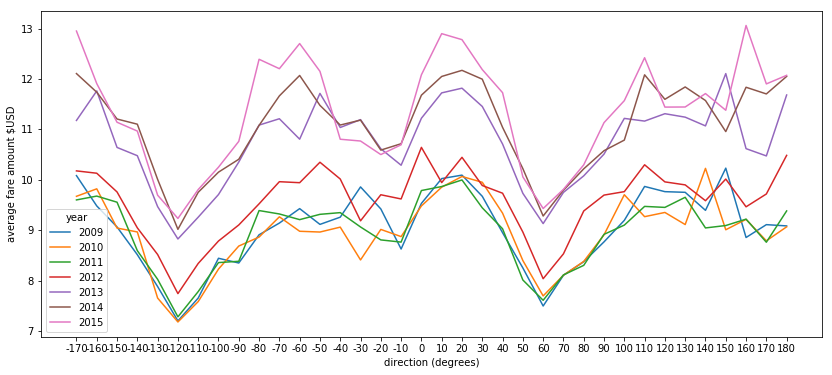

In [166]:
# ２マイル前後の距離のマンハッタン内の走行を選ぶ。
idx2 = idx_manhattan & (sa_df_taxi.distance_miles>1.5) & (sa_df_taxi.distance_miles<1.7)

# 方向と平均運賃をプロットする。
fig, ax = plt.subplots(1, 1, figsize=(14,6))
direc = pd.cut(sa_df_taxi[idx2]['direction'], np.linspace(-180, 180, 37))
sa_df_taxi[idx2].pivot_table('fare_amount', index=[direc], columns='year', aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degrees)')
plt.xticks(range(36), np.arange(-170, 190, 10))
plt.ylabel('average fare amount $USD');

つまり、同じ長さの走行でも、方向の運賃への影響は見て取れる。Oliverのノートブック (https://www.kaggle.com/ojones3/feature-engineering-corrected-manhattan-distance) では、ユークリッド距離とマンハッタン距離測定による距離計算の比較で説明されている。このノートブックでは、距離はポイントtoポイントで計算されている。これは本当の走行距離とは異なる。もし街路が碁盤の目状なら、６０度街路を傾けてマンハッタン距離を使用するとさらによい推測が得られる。

60度と-120度がポイントtoポイント計算と実際が最も近いことが、平均運賃が最も低い理由である。もし方向が60度、-120度と異なっていれば、本当の距離はもっと長いことになる。そこで、高い運賃にみえるのである。

## Kaggleのベースラインモデルと提出物の作成
トレーニングデータと同じ内容か確認するため、テストセットの内容探索も行う。

In [167]:
# test setのデータフレームに新しいコラム追加
df_test['distance_miles'] = distance(df_test.pickup_latitude, df_test.pickup_longitude, \
                                     df_test.dropoff_latitude, df_test.dropoff_longitude)
df_test['distance_to_center'] = distance(nyc[1], nyc[0], \
                                          df_test.dropoff_latitude, df_test.dropoff_longitude)
df_test['hour'] = df_test.pickup_datetime.apply(lambda t: pd.to_datetime(t).hour)
df_test['year'] = df_test.pickup_datetime.apply(lambda t: pd.to_datetime(t).year)

## Model
上記の分析に基づき、下のモデルから始める:

運賃(fare)の特徴量: year, hour, distance, passenger_count

ベースラインモデルとしては、線形回帰モデルを使用する。

In [168]:
# データセットの定義define dataset
# NYCの中心近くの15mileのポイントを選び、乗車人数０のデータポイントを削除
idx = (sa_df_taxi.distance_to_center<15) & (sa_df_taxi.passenger_count!=0)
features = ['year', 'hour', 'distance_miles', 'passenger_count']
X = sa_df_taxi[idx][features].values
y = sa_df_taxi[idx]['fare_amount'].values

In [169]:
X.shape, y.shape

((531760, 4), (531760,))

In [170]:
# 予測の簡単な分析に使える関数を定義
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)

In [171]:
# トレーニングとテストセットを作成
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


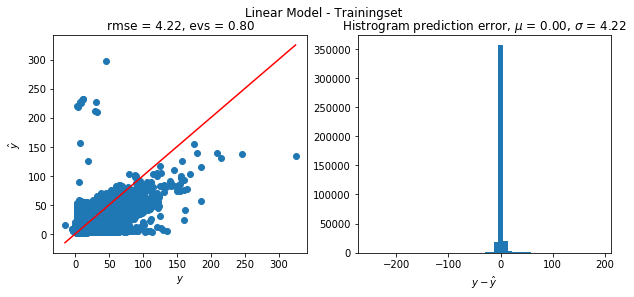

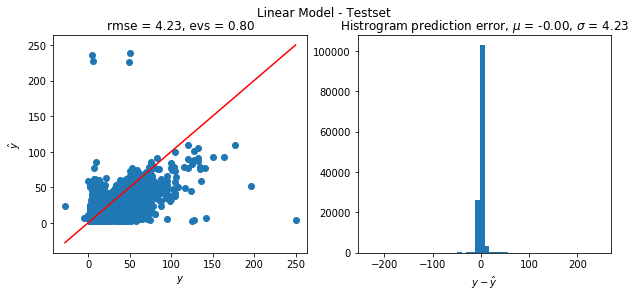

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)
plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

In [173]:
# トレーニングとテストデータセットの関連を見るため、モデル感度を見る簡単な関数を作成。
def plot_rmse_analysis(model, X, y, N=400, test_size=0.25, figsize=(10,4), title=''):
    rmse_train, rmse_test = [], []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    g = sns.jointplot(np.array(rmse_train), np.array(rmse_test), kind='scatter', stat_func=None, size=5)
    g.set_axis_labels("RMSE training ($\mu$={:.2f})".format(np.mean(rmse_train)), 
                      "RMSE test ($\mu$={:.2f})".format(np.mean(rmse_test)))
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('{} (N={}, test_size={:0.2f})'.format(title, N, test_size))

C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\12239\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


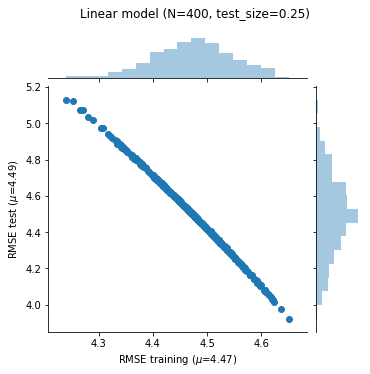

In [174]:
# 計算時間短縮のため、100kポイントのデータのみ使用する。
plot_rmse_analysis(model_lin, X[:100_000,:], y[:100_000], title='Linear model')

## Kaggle提出データを作成

In [175]:
# データセットを定義
XTEST = df_test[features].values

In [176]:
filename = './output/baseline_linear'

y_pred_final = model_lin.predict(XTEST)

submission = pd.DataFrame(
    {'key': df_test.key, 'fare_amount': y_pred_final},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

In [177]:
submission

key  fare_amount
0       2015-01-27 13:08:24.0000002    10.593479
1       2015-01-27 13:08:24.0000003    10.826932
2       2011-10-08 11:53:44.0000002     4.549215
3       2012-12-01 21:12:12.0000002     8.302238
4       2012-12-01 21:12:12.0000003    16.136956
5       2012-12-01 21:12:12.0000005    11.186899
6       2011-10-06 12:10:20.0000001     5.275760
7       2011-10-06 12:10:20.0000003    52.405005
8       2011-10-06 12:10:20.0000002    12.008517
9       2014-02-18 15:22:20.0000002     7.297874
10      2014-02-18 15:22:20.0000003    10.082779
11      2014-02-18 15:22:20.0000001    15.802849
12      2010-03-29 20:20:32.0000002     4.397347
13      2010-03-29 20:20:32.0000001     6.576155
14      2011-10-06 03:59:12.0000002     8.736868
15      2011-10-06 03:59:12.0000001    14.708126
16      2012-07-15 16:45:04.0000006     4.424093
17      2012-07-15 16:45:04.0000002     9.528629
18      2012-07-15 16:45:04.0000003     5.525364
19      2012-07-15 16:45:04.0000004     4.717800
20      2014-10-29 02:09:56.0000001     8.359559
21     2014-06-14 13:39:00.00000010     9.255028
22     2014-06-14 13:39:00.00000060     7.737212
23     2014-06-14 13:39:00.00000087     9.099727
24     2014-06-14 13:39:00.00000050    17.968376
25      2014-06-14 13:39:00.0000003     7.317028
26    2014-06-14 13:39:00.000000158    37.466328
27     2014-06-14 13:39:00.00000015    26.310460
28     2014-06-14 13:39:00.00000073     7.369260
29     2014-06-14 13:39:00.00000077    15.491121
...                             ...          ...
9884   2013-09-25 22:00:00.00000060    39.163335
9885  2013-09-25 22:00:00.000000213    16.038200
9886  2013-09-25 22:00:00.000000150    21.458765
9887   2013-09-25 22:00:00.00000010     8.433864
9888  2013-09-25 22:00:00.000000146     4.590624
9889   2013-09-25 22:00:00.00000041    10.027671
9890  2013-09-25 22:00:00.000000109    11.323884
9891  2013-09-25 22:00:00.000000210    18.202754
9892  2013-09-25 22:00:00.000000151    11.337101
9893  2013-09-25 22:00:00.000000190    15.418826
9894  2013-09-25 22:00:00.000000153    11.682387
9895  2013-09-25 22:00:00.000000241    25.171322
9896  2013-09-25 22:00:00.000000127    10.074408
9897    2015-02-20 11:08:29.0000001    17.098398
9898    2015-01-12 15:36:37.0000002     6.809920
9899    2015-06-07 00:38:14.0000002    18.137691
9900    2015-04-12 21:56:22.0000005     9.956070
9901    2015-04-10 11:56:54.0000004     8.977214
9902    2015-06-25 01:01:46.0000002    14.222417
9903    2015-05-29 10:02:42.0000001    10.720656
9904    2015-06-30 20:03:50.0000002    40.126051
9905    2015-02-27 19:36:02.0000006    27.585485
9906    2015-06-15 01:00:06.0000002     6.168751
9907    2015-02-03 09:00:58.0000001    28.140274
9908    2015-05-19 13:58:11.0000001     9.251158
9909    2015-05-10 12:37:51.0000002    10.352676
9910    2015-01-12 17:05:51.0000001    13.050674
9911    2015-04-19 20:44:15.0000001    49.484623
9912    2015-01-31 01:05:19.0000005    24.402547
9913    2015-01-18 14:06:23.0000006     8.224862

[9914 rows x 2 columns]